In [1]:
from modelling import *
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.model_selection import train_test_split

In [80]:
X, y = make_classification(
    n_samples=200000,
    n_features=10, 
    n_informative=7, 
    n_classes=2,  
    random_state=42,
    weights=[0.7,0.3],
    hypercube=False,
    class_sep=0.01,
    flip_y=0.15
)

In [81]:
df_orig = pd.DataFrame(X,columns=["C{}".format(x) for x in range(10)])
df_orig["target"] = y
df_train, df_test = train_test_split(df_orig, test_size=0.2, random_state=42)

In [71]:
df_orig.target.value_counts()

0    200920
1     99080
Name: target, dtype: int64

Building LGBM Model...


No handles with labels found to put in legend.


ROC Curve for test data: 0.8655815536462705


(LGBMClassifier(),
 {'Dataset': 'Synthetic',
  'Model': 'LGBM Baseline',
  'f1_test': 0.6912136916957937,
  'f1_train': 0.7047806431264175,
  'accuracy_test': 0.8292,
  'accuracy_train': 0.8362,
  'AUC_test': 0.8655815536462705,
  'AUC_train': 0.8747439124161431})

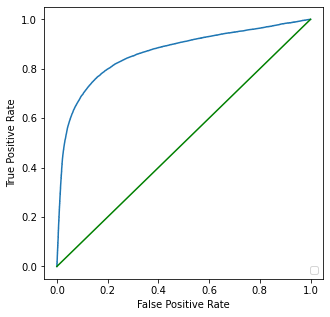

In [72]:
base_lgbm(df_train, df_test,"target","Synthetic")

In [73]:
def get_imbalanced(df:pd.DataFrame,p:float, target_col:str="target"):
    majority = df[df[target_col]==0]
    n = majority.shape[0]
    x = round((n*p)/(1-p))
    minority = df[df[target_col]==1].sample(n=x,random_state=42)
    return pd.concat([majority,minority]).sample(frac=1).reset_index(drop=True)

Building LGBM Model...


No handles with labels found to put in legend.


ROC Curve for test data: 0.8696934043020301


(LGBMClassifier(),
 {'Dataset': 'Synthetic',
  'Model': 'LGBM Baseline',
  'f1_test': 0.5792033653214145,
  'f1_train': 0.59362305757947,
  'accuracy_test': 0.8725462870794346,
  'accuracy_train': 0.8745271749950229,
  'AUC_test': 0.8696934043020301,
  'AUC_train': 0.877028294031007})

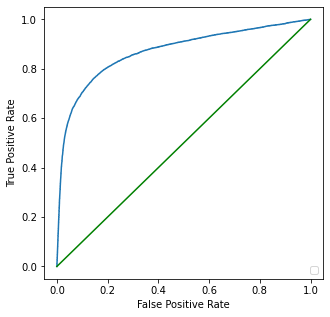

In [74]:
df_02 = get_imbalanced(df_orig,0.2)
df_02_train, df_02_test = train_test_split(df_02, test_size=0.2, random_state=42)
base_lgbm(df_02_train, df_02_test,"target","Synthetic")

Building LGBM Model...


No handles with labels found to put in legend.


ROC Curve for test data: 0.8659283670648938


(LGBMClassifier(),
 {'Dataset': 'Synthetic',
  'Model': 'LGBM Baseline',
  'f1_test': 0.4214319285602381,
  'f1_train': 0.4494131688880047,
  'accuracy_test': 0.9172881811462743,
  'accuracy_train': 0.9225118284386461,
  'AUC_test': 0.8659283670648938,
  'AUC_train': 0.8864207677312356})

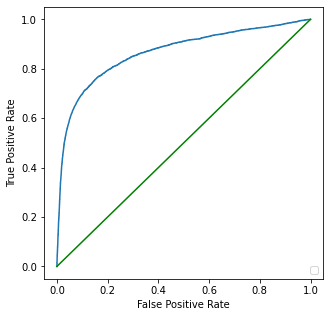

In [75]:
df_01 = get_imbalanced(df_orig,0.1)
df_01_train, df_01_test = train_test_split(df_01, test_size=0.2, random_state=42)
base_lgbm(df_01_train, df_01_test,"target","Synthetic")

Building LGBM Model...


No handles with labels found to put in legend.


ROC Curve for test data: 0.8647217864309682


(LGBMClassifier(),
 {'Dataset': 'Synthetic',
  'Model': 'LGBM Baseline',
  'f1_test': 0.25324916450055696,
  'f1_train': 0.33233830845771145,
  'accuracy_test': 0.9524575049055534,
  'accuracy_train': 0.956376037258564,
  'AUC_test': 0.8647217864309682,
  'AUC_train': 0.8981485535013832})

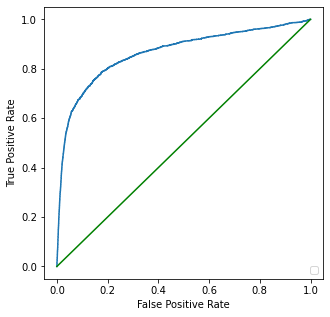

In [76]:
df_01 = get_imbalanced(df_orig,0.05)
df_01_train, df_01_test = train_test_split(df_01, test_size=0.2, random_state=42)
base_lgbm(df_01_train, df_01_test,"target","Synthetic")

Building LGBM Model...


No handles with labels found to put in legend.


ROC Curve for test data: 0.8251242653354351


(LGBMClassifier(),
 {'Dataset': 'Synthetic',
  'Model': 'LGBM Baseline',
  'f1_test': 0.0759493670886076,
  'f1_train': 0.3253968253968254,
  'accuracy_test': 0.989209164818921,
  'accuracy_train': 0.9916235010070277,
  'AUC_test': 0.8251242653354351,
  'AUC_train': 0.9612076364619461})

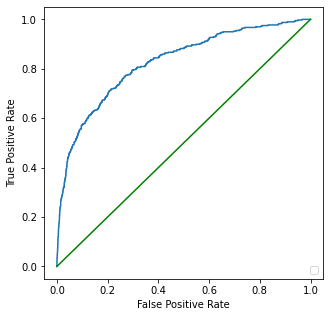

In [77]:
df_01 = get_imbalanced(df_orig,0.01)
df_01_train, df_01_test = train_test_split(df_01, test_size=0.2, random_state=42)
base_lgbm(df_01_train, df_01_test,"target","Synthetic")

Building LGBM Model...


No handles with labels found to put in legend.


ROC Curve for test data: 0.7588846454980824


(LGBMClassifier(),
 {'Dataset': 'Synthetic',
  'Model': 'LGBM Baseline',
  'f1_test': 0.05223880597014926,
  'f1_train': 0.49132420091324197,
  'accuracy_test': 0.9937106918238994,
  'accuracy_train': 0.9965520229782598,
  'AUC_test': 0.7588846454980824,
  'AUC_train': 0.9923155636626543})

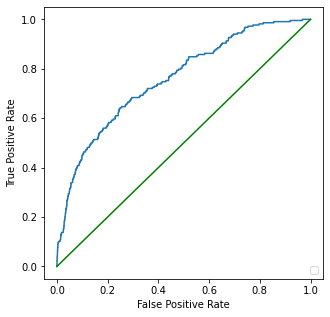

In [78]:
df_01 = get_imbalanced(df_orig,0.005)
df_01_train, df_01_test = train_test_split(df_01, test_size=0.2, random_state=42)
base_lgbm(df_01_train, df_01_test,"target","Synthetic")